Filename: /home/adeel/.astropy/cache/download/py3/60f2f72841cc6217da6a4de0af155b6e
No.    Name         Type      Cards   Dimensions   Format
  0  Count Map   PrimaryHDU     109   (3600, 1800)   int32   
  1  2FHL Source Catalog  BinTableHDU    164   360R x 39C   [18A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, E, E, 2E, E, E, 2E, E, E, E, E, I, 25A, E, E, 8A, E, E, 18A, 18A, 18A]   
  2  Extended Sources  BinTableHDU     51   25R x 10C   [18A, E, E, E, E, 25A, E, E, I, 25A]   
  3  ROIs        BinTableHDU     39   154R x 6C   [I, E, E, E, E, E]   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3600                                                  
NAXIS2  =                 1800                                                  
EXTEND  =                    T                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'GLON-AIT'           / RA---%%%, %%% represents the projection method 
CRPIX1  =               1800.5 / Reference pixel                                
CRVAL1  =                   0. / RA at the reference pixel                      
CDELT1  =                 -0.1 / X-axis incr per pixel of physical coord at posi
CUNIT1  = 'deg     '        

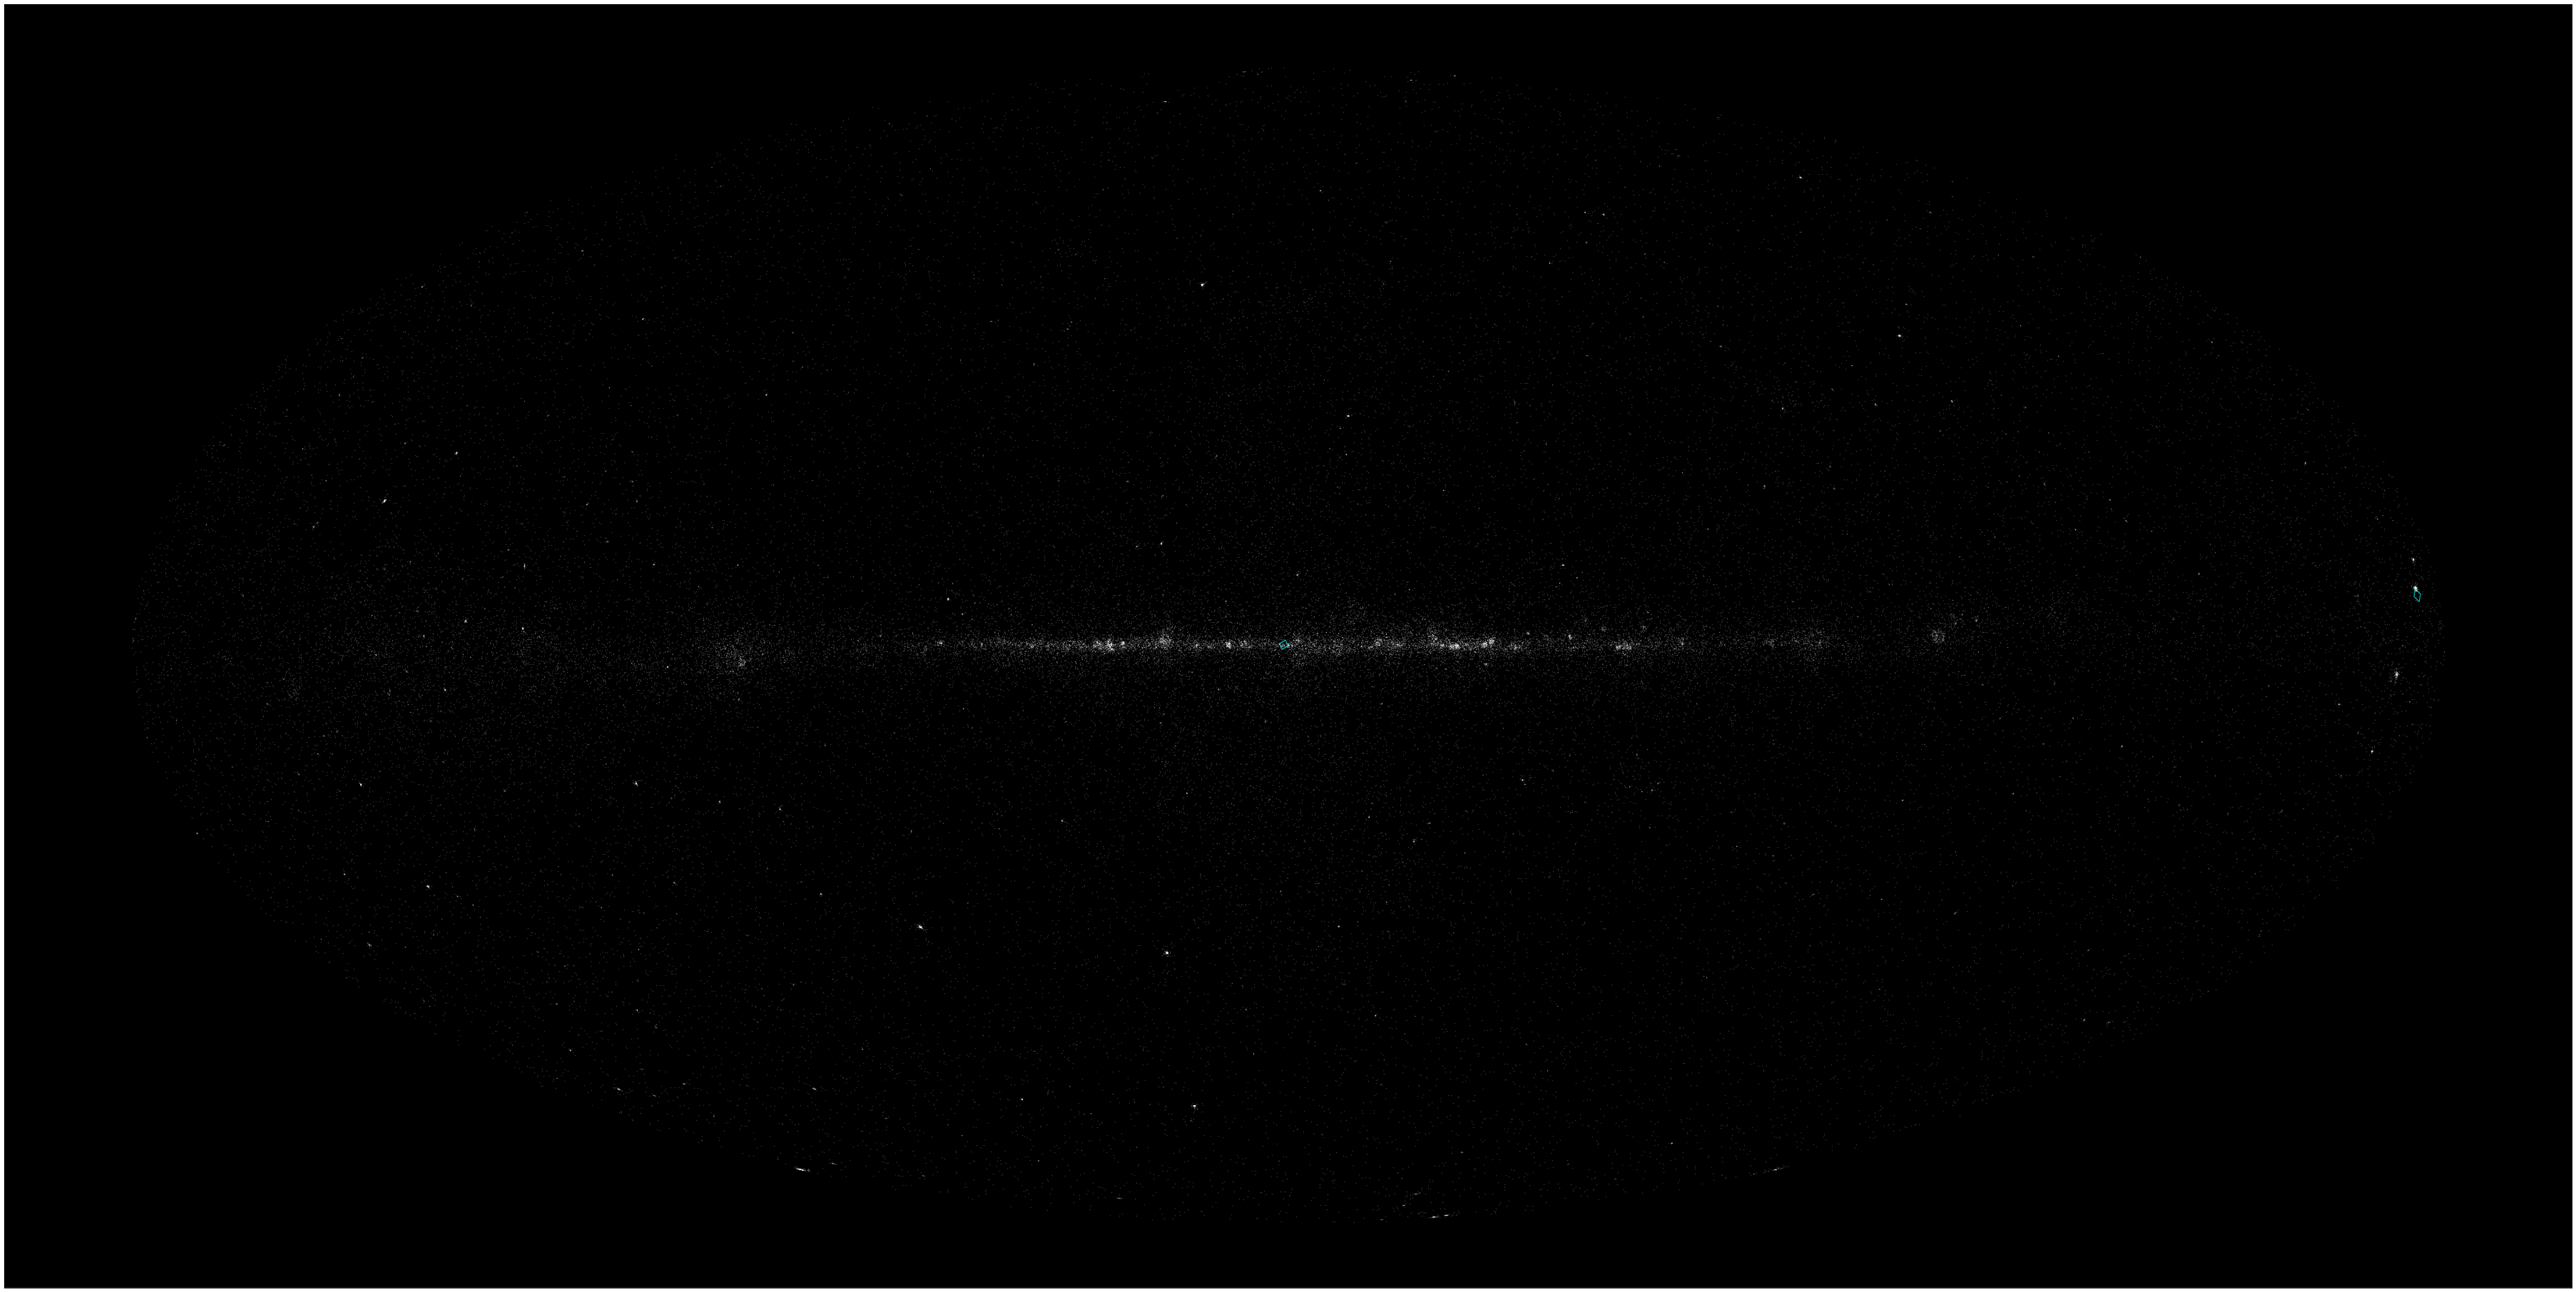

In [8]:
from astropy.visualization.wcsaxes import WCSAxes
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import healpy

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

hdu_list = fits.open('https://github.com/gammapy/gammapy-extra/blob/master/datasets/catalogs/fermi/gll_psch_v08.fit.gz?raw=true')
hdu_list.info()
wcs = WCS(hdu_list[0].header)

# plt.imshow(hdu_list[0].data, vmax=3)
# from scipy.ndimage import gaussian_filter 
# data_smoothed = gaussian_filter(hdu_list[0].data.astype('float'), 5)


fig = plt.figure()
ax = WCSAxes(fig, [10, 10, 10, 10], wcs=wcs)
fig.add_axes(ax)

# placing rectangle at the Crab Nebula
c = SkyCoord(083.63308, +22.01450, frame='icrs', unit='deg')
r = Rectangle((c.data.lon.deg, c.data.lat.deg), 1.0, 1.0, edgecolor='cyan', facecolor='none',
              transform=ax.get_transform('fk5'))
ax.add_patch(r)

# placing rectangle at the galactic center
c = SkyCoord(266.41683, -29.00781, frame='icrs', unit='deg')
r = Rectangle((c.data.lon.deg, c.data.lat.deg), 1.0, 1.0, edgecolor='cyan', facecolor='none',
              transform=ax.get_transform('fk5'))
ax.add_patch(r)

ax.imshow(hdu_list[0].data, cmap='gray', vmax=3)

hdu_list[0].header


Filename: /home/adeel/.astropy/cache/download/py3/a4ac6330f75636794031fdc69ce71812
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   (512, 512)   int16   


array([[-0.28523539, -0.16895317, -0.3607974 , -0.48113794],
       [ 0.68861915,  0.84938497,  0.87104198,  0.72007381],
       [ 0.66666667,  0.5       ,  0.33333333,  0.5       ]])

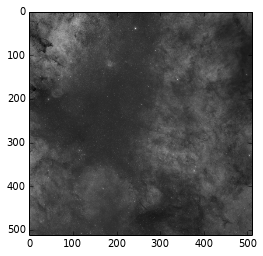

In [20]:
# fetching HiPS tile
hips_tile_hdu = fits.open('https://github.com/hipspy/hips-extra/blob/master/datasets/samples/DSS2Red/Norder3/Dir0/Npix450.fits?raw=true')
hips_tile_hdu.info()

plt.imshow(hips_tile_hdu[0].data, cmap='gray')
# healpy.boundaries(?, ?)
